In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

In [132]:
pd.set_option('display.max_columns', None)

In [133]:
df = pd.read_excel('./archive/2022.xlsx')

In [134]:
df['Country'][5] = 'Luxembourg'

/var/folders/0k/369f7zf50c59w8dkhr5_kczr0000gn/T/ipykernel_35952/1608870733.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
df[['RANK', 'Country', 'Happiness score']].head(10)

,RANK,Country,Happiness score
0,1,Finland,7821
1,2,Denmark,7636
2,3,Iceland,7557
3,4,Switzerland,7512
4,5,Netherlands,7415
5,6,Luxembourg,7404
6,7,Sweden,7384
7,8,Norway,7365
8,9,Israel,7364
9,10,New Zealand,7200


In [136]:
df.tail()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
141,142,Botswana*,3471,3667,3275,187,1503,815,280,571,12,102
142,143,Rwanda*,3268,3462,3074,536,785,133,462,621,187,544
143,144,Zimbabwe,2995,3110,2880,548,947,690,270,329,106,105
144,145,Lebanon,2955,3049,2862,216,1392,498,631,103,82,34
145,146,Afghanistan,2404,2469,2339,1263,758,0,289,0,89,5


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RANK                                        146 non-null    int64 
 1   Country                                     146 non-null    object
 2   Happiness score                             146 non-null    int64 
 3   Whisker-high                                146 non-null    int64 
 4   Whisker-low                                 146 non-null    int64 
 5   Dystopia (1.83) + residual                  146 non-null    int64 
 6   Explained by: GDP per capita                146 non-null    int64 
 7   Explained by: Social support                146 non-null    int64 
 8   Explained by: Healthy life expectancy       146 non-null    int64 
 9   Explained by: Freedom to make life choices  146 non-null    int64 
 10  Explained by: Generosity  

In [138]:
df.describe()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5553.575342,5673.589041,5433.568493,1831.808219,1410.445205,905.863014,586.171233,517.226027,147.376712,154.780822
std,42.290661,1086.842607,1065.621144,1109.379702,534.994248,421.663112,280.121541,176.336331,145.858730,82.798729,127.514353
min,1.000000,2404.000000,2469.000000,2339.000000,187.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4888.750000,5006.250000,4754.750000,1555.250000,1095.500000,732.000000,463.250000,440.500000,89.000000,68.250000
50%,73.500000,5568.500000,5680.000000,5453.000000,1894.500000,1445.500000,957.500000,621.500000,543.500000,132.500000,119.500000
75%,109.750000,6305.000000,6448.750000,6190.000000,2153.000000,1784.750000,1114.250000,719.750000,626.000000,197.750000,198.500000
max,146.000000,7821.000000,7886.000000,7756.000000,2844.000000,2209.000000,1320.000000,942.000000,740.000000,468.000000,587.000000


In [139]:
df['Country'].count()

146

<AxesSubplot:>

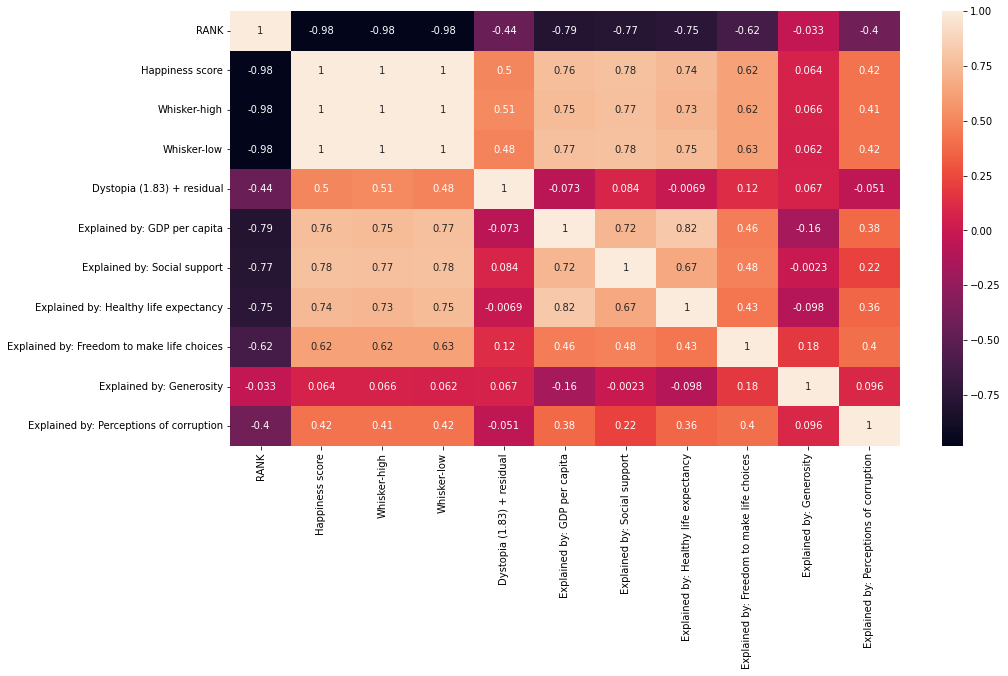

In [140]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

In [141]:
fig = px.line(df, 'Happiness score', ['Explained by: GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption'])
fig.show()

In [142]:
import pycountry_convert as pcconvert


def country_to_continent(country_name):
    country_alpha2 = pcconvert.country_name_to_country_alpha2(country_name)
    country_continent_code = pcconvert.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pcconvert.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name


df2 = df.copy()
df2['Continent'] = np.nan

for i in range(len(df)):
    try:
        if '*' in df2['Country'][i]:
            df2['Continent'][i] = country_to_continent(df2['Country'][i][:-1])
        else:
            df2['Continent'][i] = country_to_continent(df2['Country'][i])
    except KeyError as e:
        print(e)

"Invalid Country Name: 'Taiwan Province of China'"
"Invalid Country Name: 'Kosovo'"
"Invalid Country Name: 'North Cyprus'"
"Invalid Country Name: 'Hong Kong S.A.R. of China'"
"Invalid Country Name: 'Palestinian Territories'"
"Invalid Country Name: 'Eswatini, Kingdom of'"


/var/folders/0k/369f7zf50c59w8dkhr5_kczr0000gn/T/ipykernel_35952/2397224673.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [143]:
df2.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Continent
0,1,Finland,7821,7886,7756,2518,1892,1258,775,736,109,534,Europe
1,2,Denmark,7636,7710,7563,2226,1953,1243,777,719,188,532,Europe
2,3,Iceland,7557,7651,7464,2320,1936,1320,803,718,270,191,Europe
3,4,Switzerland,7512,7586,7437,2153,2026,1226,822,677,147,461,Europe
4,5,Netherlands,7415,7471,7359,2137,1945,1206,787,651,271,419,Europe


In [165]:
df2['Continent'][df2['Continent'] == 'Oceania']

9     Oceania
11    Oceania
Name: Continent, dtype: object

In [166]:
df3 = df2.drop(labels=[9,11], axis=0)

In [167]:
mean_df = df3.groupby('Continent').mean()

In [168]:
mean_df.head()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
Continent,,,,,,,,,,,
Africa,115.717949,4531.000000,4693.179487,4368.871795,1849.025641,987.000000,624.384615,379.487179,416.410256,150.666667,124.153846
Asia,81.666667,5323.871795,5428.717949,5219.128205,1567.589744,1421.435897,881.820513,604.435897,536.846154,163.051282,148.794872
Europe,37.230769,6469.820513,6560.820513,6378.769231,1932.410256,1776.846154,1138.769231,725.000000,566.564103,138.487179,191.846154
North America,41.545455,6288.818182,6424.000000,6153.272727,2273.909091,1482.545455,998.000000,637.363636,618.818182,127.454545,150.909091
South America,63.700000,5788.200000,5898.200000,5678.400000,2044.500000,1318.600000,1005.700000,661.700000,542.000000,120.400000,95.500000


In [169]:
continent_index = mean_df.index.get_level_values(0)

In [172]:
plt.figure(figsize=(10,12))
fig2 = px.bar(mean_df, continent_index, 'Happiness score', color=continent_index)
fig2.show()

<Figure size 720x864 with 0 Axes>

In [ ]:
fig3 = px.histogram(df2, 'Happiness score', color='Continent', )
fig3.show()

In [ ]:
plt.figure(figsize=(10,20))
fig4 = px.line(df2, 'Happiness score', ['Explained by: GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption'])
fig4.show()

<Figure size 720x1440 with 0 Axes>

In [ ]:
fig5 = px.bar(df2, 'Continent', 'Happiness score', color='Explained by: GDP per capita')
fig5.show()